## Use ML to predict the Heart Disease Motality based on the social local policies and life styles

### Target is classified in 2 categories
---
    1. High Rate
    0. Low Rate


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [4]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Largest_sector,Level
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,2376.0,321,544.0,358,1061,882,336,878,Manufacturing,1
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,4237.0,579,550.0,459,1664,1309,675,1616,Manufacturing,1
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,223530.0,37266,27075.0,11867,45753,66655,67719,99544,"Educational services, and health care and soci...",1
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,13584.0,1661,5869.0,1798,4371,2314,1194,8539,"Educational services, and health care and soci...",2
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,615.0,143,96.0,36,225,240,144,232,Public administration,1


In [5]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Uninsured,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Level
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3071.000000,3.071000e+03,3.072000e+03,3.071000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3072.000000
mean,17.832357,3.972363,4.149642,17.361979,32.817708,7.424577,27.353516,62.892578,17.485677,11.504232,...,8977.153696,7.683507e+04,1.892521e+04,1.330867e+04,8.599790e+03,1.891054e+04,2.031700e+04,2.208112e+04,3.480105e+04,2.469727
std,4.704372,0.696459,0.592199,3.548037,5.430713,1.270692,5.692320,23.424658,3.176629,5.190727,...,35474.297222,2.526495e+05,5.313433e+04,4.601938e+04,3.762167e+04,5.130057e+04,6.145624e+04,8.044333e+04,1.125637e+05,1.104914
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,23.000000,1.190000e+02,1.000000e+01,5.000000e+00,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,1.900000e+01,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,49.000000,15.000000,7.000000,...,876.500000,7.245000e+03,2.538500e+03,1.565500e+03,9.677500e+02,2.745750e+03,2.277250e+03,1.194750e+03,3.283500e+03,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.700000,27.000000,66.000000,18.000000,11.000000,...,2140.000000,1.743800e+04,5.767000e+03,3.724000e+03,2.464500e+03,6.334000e+03,5.325500e+03,3.162500e+03,7.950500e+03,2.000000
75%,21.000000,4.400000,4.600000,20.000000,36.000000,8.200000,31.000000,80.000000,20.000000,15.000000,...,5675.500000,4.730000e+04,1.444550e+04,9.175500e+03,5.667500e+03,1.511100e+04,1.442075e+04,1.049675e+04,2.250150e+04,4.000000
max,41.000000,6.500000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,935213.000000,7.703359e+06,1.527541e+06,1.409155e+06,1.460718e+06,1.416482e+06,1.790808e+06,2.177481e+06,3.260029e+06,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a309d79788>,
 'caps': [<matplotlib.lines.Line2D at 0x1a309c08ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a309c00308>],
 'medians': [<matplotlib.lines.Line2D at 0x1a309c11e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a309c11708>],
 'means': []}

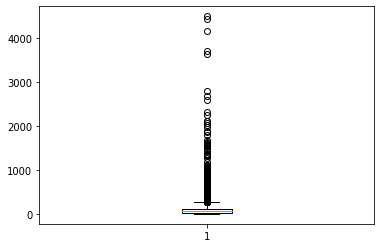

In [6]:
# This feature has so many outliers

series = df["Average_Traffic_Volume_per_Meter_of_Major_Roadways"]
plt.boxplot(series) 

In [7]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways"], inplace=True)

In [8]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 68, dtype: int64

In [9]:
# Find columns that contain NULL value
col_null = list(col_count[col_count != 3072].index)
col_null

['Household_Income_AIAN',
 'Household_Income_Asian',
 'Household_Income_Black',
 'Household_Income_Hispanic',
 'Household_Income_White',
 'Percent_Severe_Housing_Cost_Burden',
 'Percent_Children_in_Poverty',
 'Teen_Birth_Rate',
 'Uninsured',
 'Insured',
 'Poverty']

In [10]:
# drop columns
df.drop(columns=["Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty","Teen_Birth_Rate"], inplace=True)


In [11]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [12]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 65, dtype: int64

In [13]:
# Drop Combo keys of dataframe
keys = ['State_Name', 'County']

In [14]:
# Find Object Type Columns 
obj_cols =list(df.dtypes[df.dtypes=='object'].index)
obj_cols = [ name for name in obj_cols if not name in keys]
obj_cols

['Largest_sector']

In [15]:
df[obj_cols].nunique()

Largest_sector    10
dtype: int64

In [16]:
df_encoder = pd.get_dummies(df[obj_cols])
df_encoder

,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3067,0,0,0,1,0,0,0,0,0,0
3068,0,1,0,0,0,0,0,0,0,0
3069,0,0,0,1,0,0,0,0,0,0
3070,0,0,0,1,0,0,0,0,0,0


In [17]:
# Merge the two DataFrames together and drop the Country column
df = df.merge(df_encoder,left_index=True,right_index=True)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,0,0,0,0,1,0,0,0,0,0
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,0,0,0,0,1,0,0,0,0,0
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,0,0,0,1,0,0,0,0,0,0
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,0,0,0,1,0,0,0,0,0,0
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,0,0,0,0,0,0,1,0,0,0


In [18]:
# Drop column list
# Column Level is Target
drop_cols = keys + obj_cols + ["Level"]
# Bucket the targets in two group 
# 1 High Rate
# 0 Low Rate
y = np.array([1 if x in [3,4] else 0 for x in df["Level"].values])
print(y[:5])
# Create our features
X = df.drop(columns= drop_cols)
X.head()

[0 0 0 0 0]


,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,17,3.4,2.8,17,51,5.3,30,100,17,28,...,0,0,0,0,1,0,0,0,0,0
1,15,3.0,2.5,15,44,7.6,30,100,19,20,...,0,0,0,0,1,0,0,0,0,0
2,15,3.5,3.2,15,32,8.0,18,100,21,13,...,0,0,0,1,0,0,0,0,0,0
3,24,5.4,4.6,30,31,2.9,31,100,22,20,...,0,0,0,1,0,0,0,0,0,0
4,15,3.7,3.6,18,42,6.9,29,100,21,17,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78, stratify=y)

In [20]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

LDA: 0.8186071899115378 (0.02366654940105068)
KNC: 0.8042518351214005 (0.024767639111608928)
NB: 0.5429832486354227 (0.016627115940348252)
SVM: 0.833768115942029 (0.006126703097676138)
LR: 0.823811405985319 (0.022258715439761965)
DTC: 0.748695652173913 (0.027599590503933416)
RFC: 0.8385638998682475 (0.021160974342092537)
ETC: 0.8346621494447583 (0.017995709460632822)
ABC: 0.8159759081498212 (0.02023271710654993)
GBC: 0.8385544889892718 (0.015488818363475574)


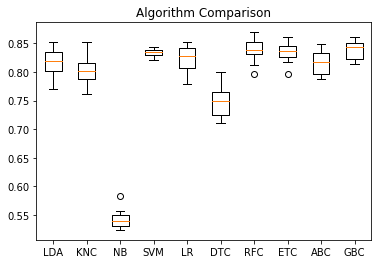

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Spot Check Algorithms
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR',LogisticRegression(solver='lbfgs')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier(n_estimators=500)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=500)))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
              
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=78, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# KNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=500)

In [23]:
kn_model = kn_model.fit(X_train_scaled, y_train)

In [24]:
# Run the test with model
y_pred = kn_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.7955729166666666

In [25]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,338,81
Actual High,76,273


In [26]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       419
           1       0.77      0.78      0.78       349

    accuracy                           0.80       768
   macro avg       0.79      0.79      0.79       768
weighted avg       0.80      0.80      0.80       768



# SVM

In [27]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

In [28]:
svc_model = svc_model.fit(X_train_scaled, y_train)

In [29]:
# Run the test with model
y_pred = svc_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.82421875

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,347,72
Actual High,63,286


In [31]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       419
           1       0.80      0.82      0.81       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



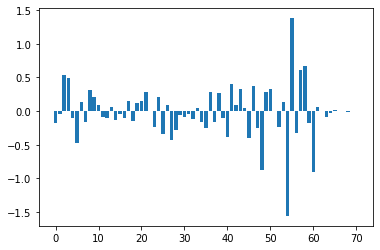

[(1.3811232929677948, 'Poverty'),
 (0.6705798582173997, 'College_or_associates'),
 (0.6172668893091082, 'High_school_only'),
 (0.5302450222507108, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.492251296918937, 'Percent_Smokers'),
 (0.4032573114882898, 'Percent_Insufficient_Sleep'),
 (0.36675021806552177, 'Male_Under_30'),
 (0.32419082351513034, 'Pop_Under_30'),
 (0.32373663430996, 'Female_30-59'),
 (0.3155434318877093, 'Percent_Excessive_Drinking')]

In [32]:
# get importance
importances = svc_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [34]:
lda_model = lda_model.fit(X_train_scaled, y_train)

In [35]:
# Run the test with model
y_pred = lda_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.8177083333333334

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,346,73
Actual High,67,282


In [37]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       419
           1       0.79      0.81      0.80       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



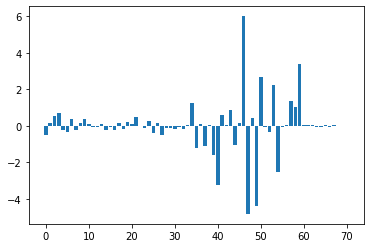

[(5.996260623300586, 'Male_Under_30'),
 (3.405078481969126, 'Bachelor_degree_or_higher'),
 (2.670188257977854, 'Female_30-59'),
 (2.21440724910405, 'Insured'),
 (1.3569180863193995, 'High_school_only'),
 (1.223646073025877, 'Population'),
 (1.046635698713973, 'College_or_associates'),
 (0.8860311947590792, 'Pop_Under_30'),
 (0.6889507311886546, 'Percent_Smokers'),
 (0.5659274620409664, 'Percent_Insufficient_Sleep')]

In [38]:
# get importance
importances = lda_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Logistic Regression

In [39]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', random_state=78)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Run the test with model
y_pred = lr_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.82421875

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,345,74
Actual High,61,288


In [42]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       419
           1       0.80      0.83      0.81       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.83      0.82      0.82       768



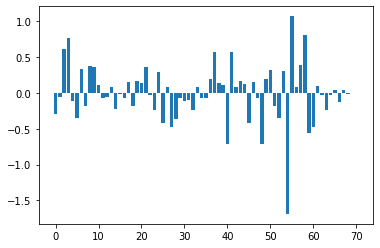

[(1.0679310641352058, 'Poverty'),
 (0.8115859976587568, 'College_or_associates'),
 (0.7690389243744429, 'Percent_Smokers'),
 (0.6104647914387357, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.570929389580722, 'Percent_Insufficient_Sleep'),
 (0.565985562855222, 'Population_Asian'),
 (0.38160596849651063, 'High_school_only'),
 (0.37440172955219486, 'Percent_Excessive_Drinking'),
 (0.3649174361812175, 'Polution_Average_Daily_PM2.5'),
 (0.3553327984352541, 'Percent_Uninsured')]

In [43]:
# get importance
importances = lr_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
# Create a model Decision Tree
dt_model =  DecisionTreeClassifier(random_state=78) 

In [45]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [46]:
# Run the test with model
y_pred = dt_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.76953125

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,318,101
Actual High,76,273


In [48]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       419
           1       0.73      0.78      0.76       349

    accuracy                           0.77       768
   macro avg       0.77      0.77      0.77       768
weighted avg       0.77      0.77      0.77       768



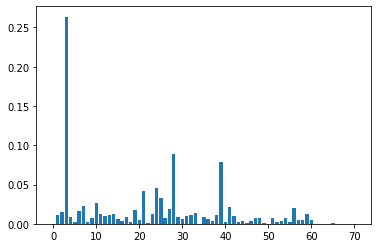

[(0.2635980845250481, 'Percent_Smokers'),
 (0.08913115827711005, 'Median_Household_Income'),
 (0.07890285613020792, 'Population_Hispanic'),
 (0.046193271112792214, 'Percent_Drive_Alone_to_Work'),
 (0.04162164398624852, 'Polution_Average_Daily_PM2.5'),
 (0.032275222019423656, 'Percent_Long_Commute'),
 (0.02693172001204574, 'Primary_Care_Physicians_Rate'),
 (0.022752912276247466, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.021776620616699303, 'Percent_Insufficient_Sleep'),
 (0.019608680188748954, 'Less_than_high_school')]

In [49]:
importances = dt_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=2000, random_state=78, max_depth= 1000, criterion='entropy') 

In [51]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [52]:
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.8190104166666666

In [53]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,358,61
Actual High,78,271


In [54]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       419
           1       0.82      0.78      0.80       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



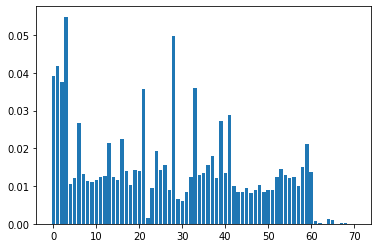

[(0.05488208987751185, 'Percent_Smokers'),
 (0.04974310380371258, 'Median_Household_Income'),
 (0.04171028388212715, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.039197866690367185, 'Percent_Fair_or_Poor_Health'),
 (0.037559344940815066, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.03595645015014402, 'Household_Income_White'),
 (0.03583067172050702, 'Polution_Average_Daily_PM2.5'),
 (0.028791145410261402, 'Percent_Insufficient_Sleep'),
 (0.02733862445538177, 'Population_Hispanic'),
 (0.02663722669964075, 'Percent_Physically_Inactive')]

In [55]:
importances = rf_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Extra Trees

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
# Create a extra Trees classifier.
et_model = ExtraTreesClassifier(n_estimators=2000, random_state=78, max_depth =1000) 

In [57]:
et_model = et_model.fit(X_train_scaled, y_train)

In [58]:
# Run the test with model
y_pred = et_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.8190104166666666

In [59]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,355,64
Actual High,75,274


In [60]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       419
           1       0.81      0.79      0.80       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



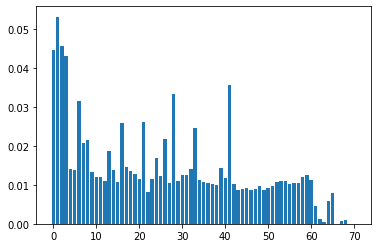

[(0.05311444411994045, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.04552460109167704, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.0445807502369902, 'Percent_Fair_or_Poor_Health'),
 (0.04305453391746166, 'Percent_Smokers'),
 (0.03557811591809142, 'Percent_Insufficient_Sleep'),
 (0.033400823018200285, 'Median_Household_Income'),
 (0.03152072645616879, 'Percent_Physically_Inactive'),
 (0.026155971237687283, 'Polution_Average_Daily_PM2.5'),
 (0.025738700763816964, 'Percent_Some_College'),
 (0.024464626988058867, 'Household_Income_White')]

In [61]:
importances = et_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Ada Boost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=256)

In [63]:
ab_model = ab_model.fit(X_train_scaled, y_train)

In [64]:
# Run the test with model
y_pred = ab_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.8216145833333334

In [65]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,350,69
Actual High,68,281


In [66]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       419
           1       0.80      0.81      0.80       349

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



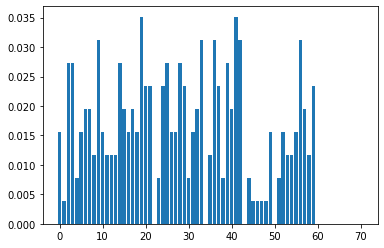

[(0.03515625, 'Social_Association_Rate'),
 (0.03515625, 'Percent_Insufficient_Sleep'),
 (0.03125, 'Population_AIAN'),
 (0.03125, 'Percent_Uninsured'),
 (0.03125, 'Percent_Homeowners'),
 (0.03125, 'Less_than_high_school'),
 (0.03125, 'Household_Income_White'),
 (0.02734375, 'Population_Hispanic'),
 (0.02734375, 'Percent_Vaccinated'),
 (0.02734375, 'Percent_Smokers')]

In [67]:
importances = ab_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=78)

In [69]:
gb_model = gb_model.fit(X_train_scaled, y_train)

In [70]:
# Run the test with model
y_pred = gb_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.828125

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual High"], columns=["Predicted Low", "Predicted High"])

cm_df

,Predicted Low,Predicted High
Actual Low,357,62
Actual High,70,279


In [72]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       419
           1       0.82      0.80      0.81       349

    accuracy                           0.83       768
   macro avg       0.83      0.83      0.83       768
weighted avg       0.83      0.83      0.83       768



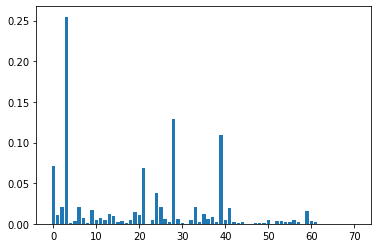

[(0.25476833080913297, 'Percent_Smokers'),
 (0.1284589452260816, 'Median_Household_Income'),
 (0.10893074319970675, 'Population_Hispanic'),
 (0.0706573844771836, 'Percent_Fair_or_Poor_Health'),
 (0.06854828969879717, 'Polution_Average_Daily_PM2.5'),
 (0.037508486633110724, 'Percent_Drive_Alone_to_Work'),
 (0.020945978573577332, 'Percent_Long_Commute'),
 (0.020617972261287778, 'Household_Income_White'),
 (0.0202318294832833, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.020091395017528338, 'Percent_Physically_Inactive')]

In [73]:
importances = gb_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Deep Learning

In [74]:
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*2
hidden_nodes_layer3 = number_input_features*1
hidden_nodes_layer4 = number_input_features//2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fouth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 213)               15336     
_________________________________________________________________
dense_1 (Dense)              (None, 142)               30388     
_________________________________________________________________
dense_2 (Dense)              (None, 71)                10153     
_________________________________________________________________
dense_3 (Dense)              (None, 35)                2520      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 36        
Total params: 58,433
Trainable params: 58,433
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 2304 samples
Epoch 1/100
2304/2304 [==============================] - 1s 287us/sample - loss: 0.4619 - accuracy: 0.7960
Epoch 2/100
2304/2304 [==============================] - 0s 66us/sample - loss: 0.3754 - accuracy: 0.8398
Epoch 3/100
2304/2304 [==============================] - 0s 65us/sample - loss: 0.3440 - accuracy: 0.8533
Epoch 4/100
2304/2304 [==============================] - 0s 66us/sample - loss: 0.3299 - accuracy: 0.8650
Epoch 5/100
2304/2304 [==============================] - 0s 68us/sample - loss: 0.2843 - accuracy: 0.8876
Epoch 6/100
2304/2304 [==============================] - 0s 63us/sample - loss: 0.2612 - accuracy: 0.8911
Epoch 7/100
2304/2304 [==============================] - 0s 65us/sample - loss: 0.2554 - accuracy: 0.8945
Epoch 8/100
2304/2304 [==============================] - 0s 64us/sample - loss: 0.2167 - accuracy: 0.9076
Epoch 9/100
2304/2304 [==============================] - 0s 65us/sample - loss: 0.1854 - accuracy: 0.9297
Epoch 10/100
2304/2304 

2304/2304 [==============================] - 0s 66us/sample - loss: 1.7069e-05 - accuracy: 1.0000
Epoch 76/100
2304/2304 [==============================] - 0s 62us/sample - loss: 1.6193e-05 - accuracy: 1.0000
Epoch 77/100
2304/2304 [==============================] - 0s 64us/sample - loss: 1.5425e-05 - accuracy: 1.0000
Epoch 78/100
2304/2304 [==============================] - 0s 64us/sample - loss: 1.4709e-05 - accuracy: 1.0000
Epoch 79/100
2304/2304 [==============================] - 0s 63us/sample - loss: 1.3984e-05 - accuracy: 1.0000
Epoch 80/100
2304/2304 [==============================] - 0s 61us/sample - loss: 1.3318e-05 - accuracy: 1.0000
Epoch 81/100
2304/2304 [==============================] - 0s 64us/sample - loss: 1.2702e-05 - accuracy: 1.0000
Epoch 82/100
2304/2304 [==============================] - 0s 64us/sample - loss: 1.2127e-05 - accuracy: 1.0000
Epoch 83/100
2304/2304 [==============================] - 0s 63us/sample - loss: 1.1567e-05 - accuracy: 1.0000
Epoch 84/100
2

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

768/768 - 0s - loss: 2.0065 - accuracy: 0.8242
Loss: 2.0065018186966577, Accuracy: 0.82421875
